## Problem Statement
Use scikit learn’s Decision Tree class to model and make predictions on the car
acceptability using the following dataset:
http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [1]:
#import necessary model

import numpy as np 
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt 
from sklearn import tree,metrics,model_selection



In [2]:
#Load the dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
#add the columns to the dataset

data.columns=['buying','maint','doors','persons','lug_boot','safety','class']

In [5]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## EDA [Exploratory Data Analysis]

In [6]:
#Check a few information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


The training dataset has 1728 rows and 7 columns.

There are no missing values in the dataset.

All the vales in the dataset are of datatype String.

The Target Variable is name class in the dataset. The values are represented in string format. 

In [7]:
#check the unique values in the target variable 

data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

There are 4 unique values. The algorithm requires the variables to be coded into integer codes. 

In [8]:
#convert the string categorical values into an integer code using factorize method of the pandas library.
data['class'],class_names = pd.factorize(data['class'])
print(class_names)
print(data['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


In [9]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [10]:
#the class value is converted into integer 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null int64
dtypes: int64(1), object(6)
memory usage: 94.6+ KB


all thw independent variables/features/predictor variables are in String . convert the predictor variable also to integer using 
factorize

In [11]:
#converting the column buying from String to integer
data['buying'],buying_names = pd.factorize(data['buying'])

print(buying_names)
print(data['buying'].unique())

Index(['vhigh', 'high', 'med', 'low'], dtype='object')
[0 1 2 3]


In [12]:
#converting the column maint from String to Integer
data['maint'],maint_names = pd.factorize(data['maint'])

print(maint_names)
print(data['maint'].unique())

Index(['vhigh', 'high', 'med', 'low'], dtype='object')
[0 1 2 3]


In [14]:
#converting the column doors from String to Integer
data['doors'],doors_names = pd.factorize(data['doors'])

print(doors_names)
print(data['doors'].unique())

Int64Index([0, 1, 2, 3], dtype='int64')
[0 1 2 3]


In [15]:
#converting the column persons from String to Integer
data['persons'],persons_names = pd.factorize(data['persons'])

print(persons_names)
print(data['persons'].unique())

Index(['2', '4', 'more'], dtype='object')
[0 1 2]


In [16]:
#converting the column lug_boot from String to Integer
data['lug_boot'] , lugBoot_names = pd.factorize(data['lug_boot'])

print(lugBoot_names)
print(data['lug_boot'].unique())

Index(['small', 'med', 'big'], dtype='object')
[0 1 2]


In [17]:
#converting the column safety from String to Integer
data['safety'],safety_names = pd.factorize(data['safety'])

print(safety_names)
print(data['safety'].unique())


Index(['low', 'med', 'high'], dtype='object')
[0 1 2]


In [18]:
#check data 

data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [19]:
# check the data types now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


All the columns are converted into I ntegerformat now 

## Building  the model 

In [20]:
# seperate the independent and dependent variables 

x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [21]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [23]:
#split the data into train and test 

# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
580,1,1,1,1,1,1
1214,2,3,0,2,2,2
1665,3,3,1,2,0,0
661,1,2,0,1,1,1
587,1,1,1,2,0,2


In [25]:
X_train.shape


(1209, 6)

In [26]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1318,3,0,0,2,1,1
124,0,1,0,1,2,1
648,1,2,0,0,0,0
249,0,2,1,0,2,0
1599,3,2,3,0,2,0


In [27]:
X_test.shape

(519, 6)

In [28]:
#Training model / Model fitting

#train the decision tree 

dtree = tree.DecisionTreeClassifier(criterion='entropy' , max_depth=3,random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [29]:
#use thw model the predict the test dataset 
y_pred = dtree.predict(X_test)

In [30]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [31]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Misclassified samples: 96
Accuracy: 0.82


Decision algorithm was able to achieve a classification accuracy of 82% on the held out set. Only 96 samples were misclassified. 

## Visualization of the decision graph:

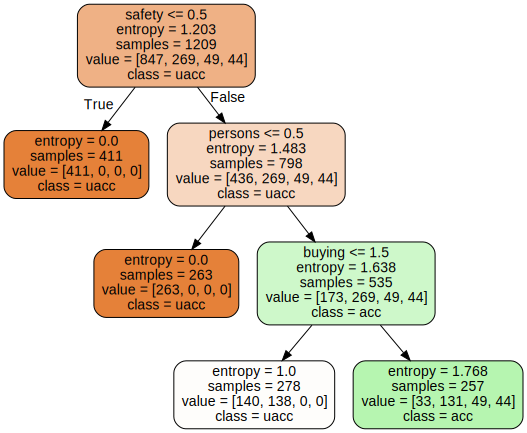

In [32]:
import graphviz
feature_names = x.columns

dot_data = tree.export_graphviz(dtree, out_file=None , filled=True, rounded=True , feature_names=feature_names ,  class_names= ['uacc','acc','vgood','good'])

graph =graphviz.Source(dot_data)
graph